In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.metrics import mean_absolute_error

# Define the project root directory
project_root = os.path.dirname(os.path.dirname(os.getcwd())) + "/harmonize_project"

# Add the project root to the system path for importing custom modules
sys.path.append(project_root)

# Import the utility function for extracting experiment data
from lib.utils import extract_experiment_data  # noqa

In [2]:
# Define the directory containing the prediction files
exp_dir = project_root + "/output/predictions_age_regression/site-target_dependence/"

# List of harmonization methods to process
methods = ["WDH", "Unharmonized", "PrettyHarmonize", "TTL", "NoTarget"]

# Initialize an empty DataFrame to store the combined results
results = pd.DataFrame()

# Loop through each harmonization method
for method in methods:
    # Initialize a temporary DataFrame to store results for the current method
    results_method = pd.DataFrame()

    print(f"Processing method: {method}")

    # Load the predicted values (y_pred) for the current method
    results_method["y_pred"] = pd.read_csv(
        exp_dir + f"y_pred_{method}.csv", index_col=0
    ).dropna(axis=1).to_numpy().ravel()

    # Load the true values (y_true)
    results_method["y_true"] = pd.read_csv(
        exp_dir + "y_true.csv", index_col=0
    ).dropna(axis=1).to_numpy().ravel()

    # Load the site information
    results_method["site"] = pd.read_csv(
        exp_dir + "sites.csv", index_col=0
    ).dropna(axis=1).to_numpy().ravel()

    # Calculate the difference between true and predicted values
    results_method["y_diff"] = results_method["y_true"] - results_method["y_pred"]

    # Add a column to indicate the harmonization scheme
    results_method["Harmonization Scheme"] = method

    # Append the results for the current method to the main results DataFrame
    results = pd.concat([results, results_method], ignore_index=True)

# The `results` DataFrame now contains combined data for all methods

Processing method: WDH
Processing method: Unharmonized
Processing method: PrettyHarmonize
Processing method: TTL
Processing method: NoTarget


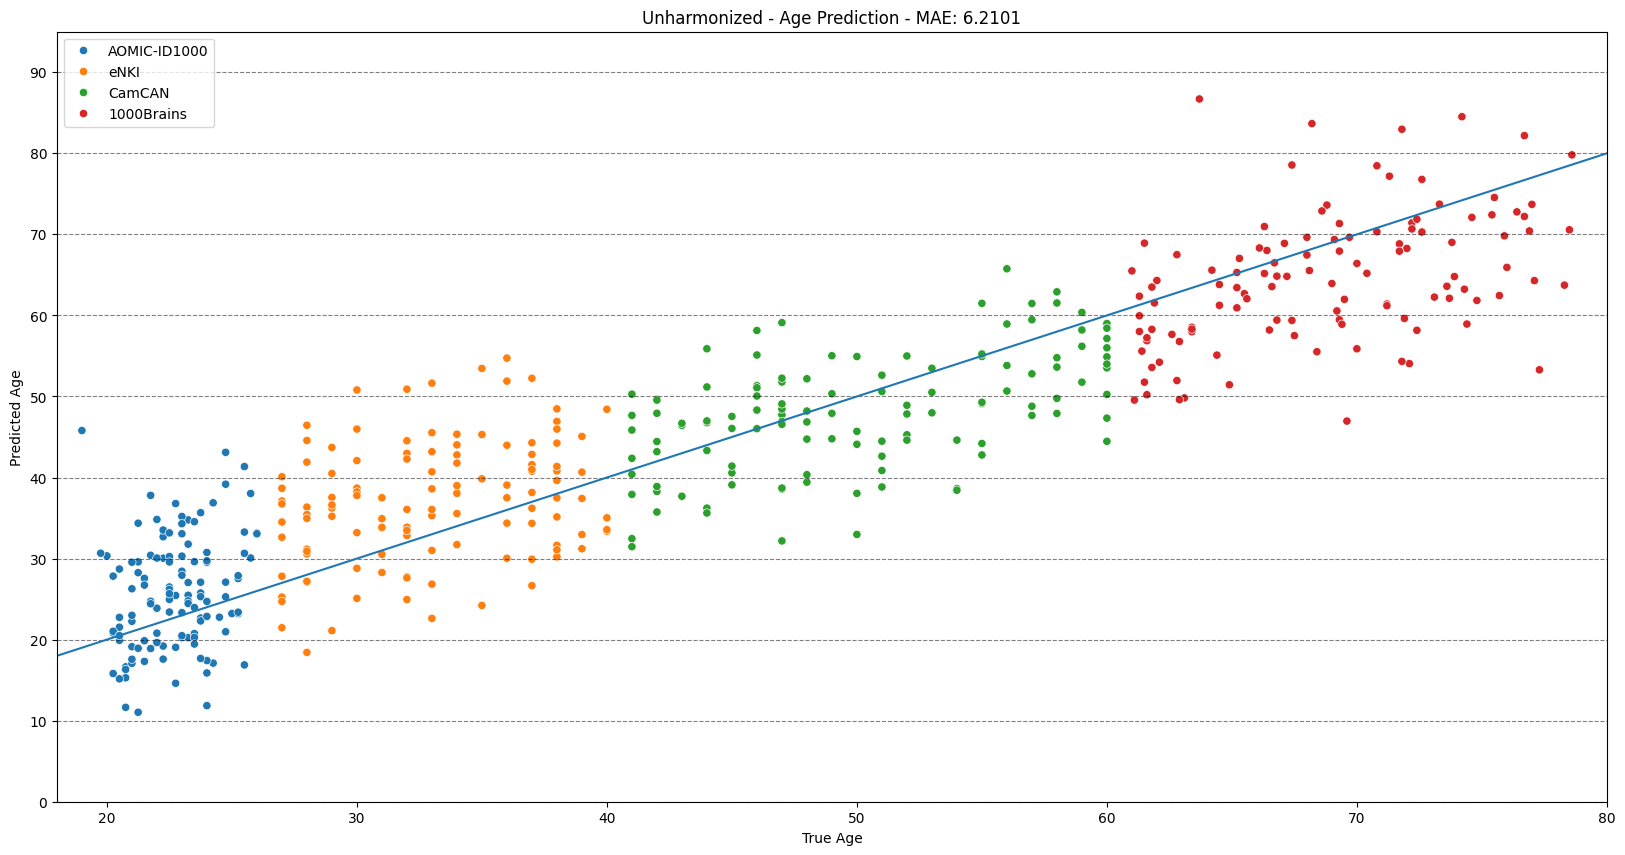

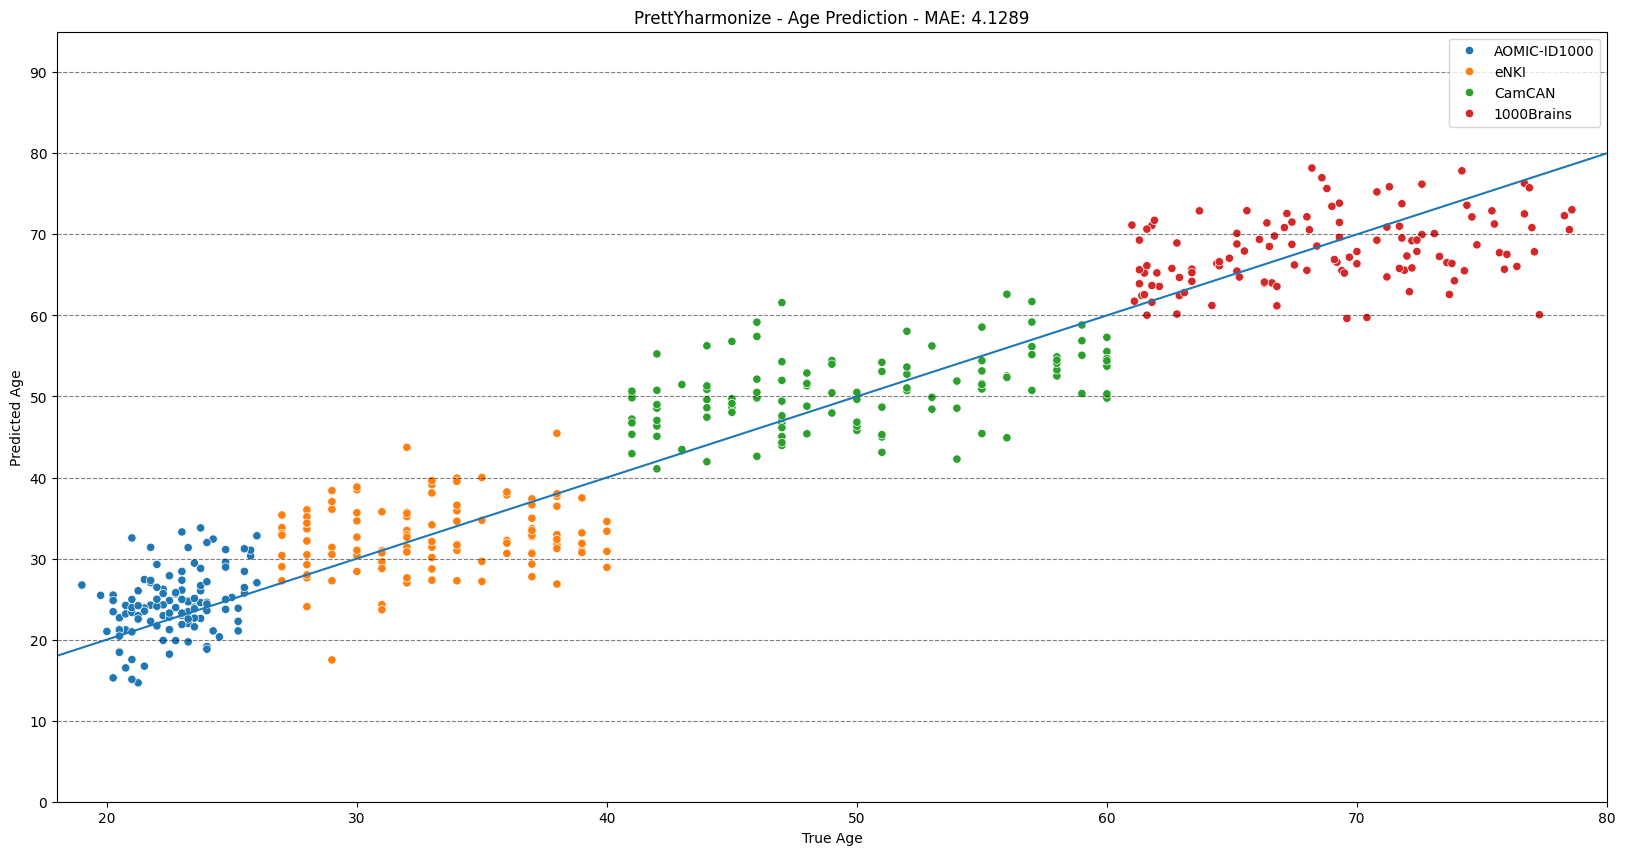

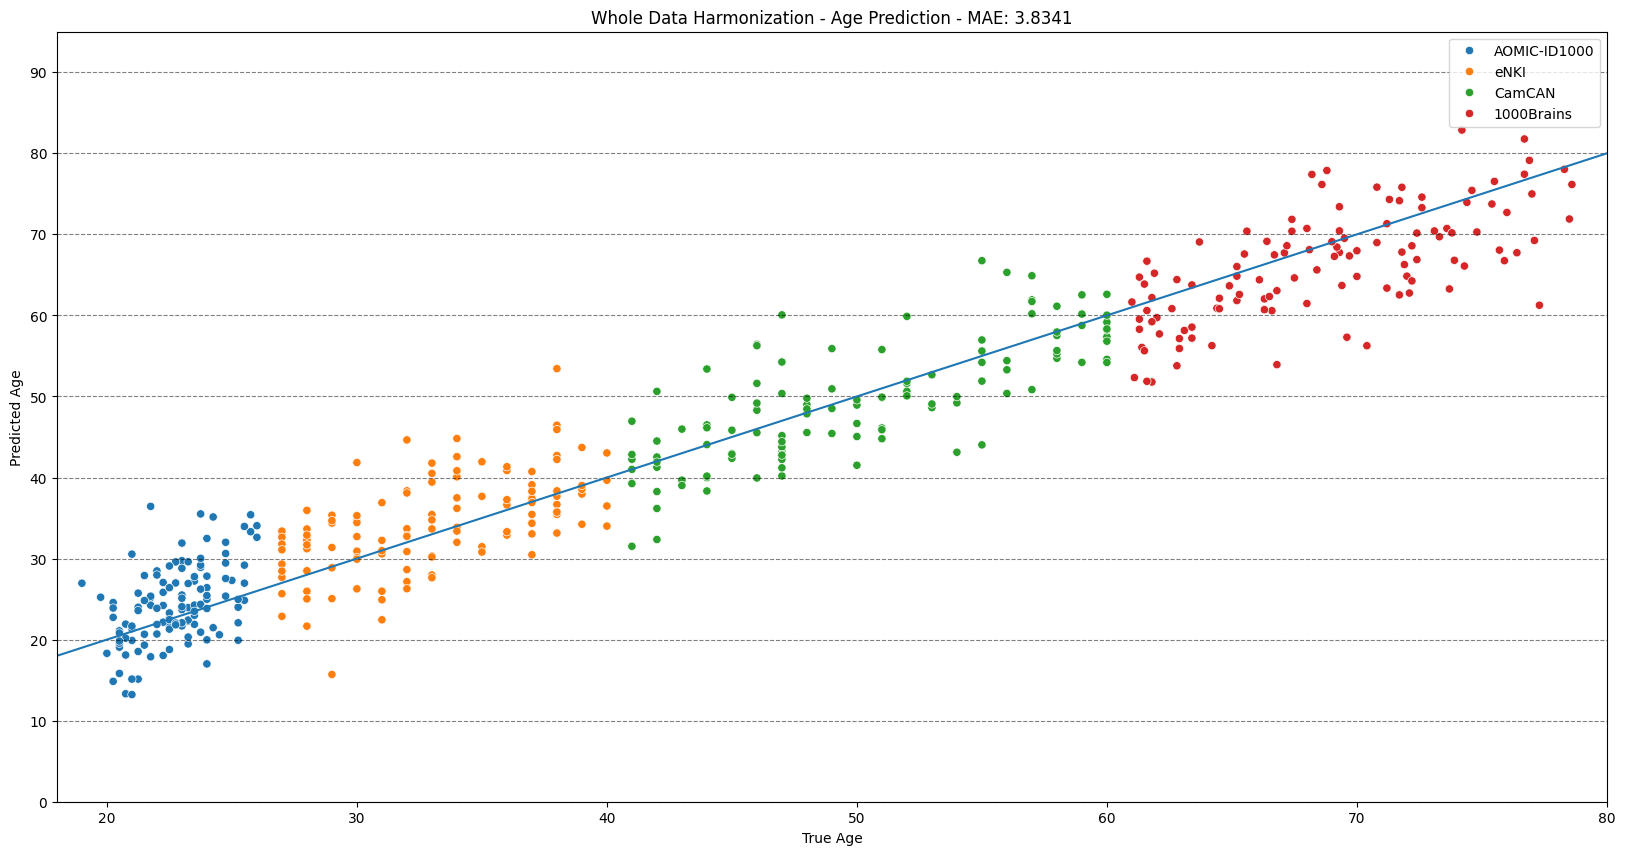

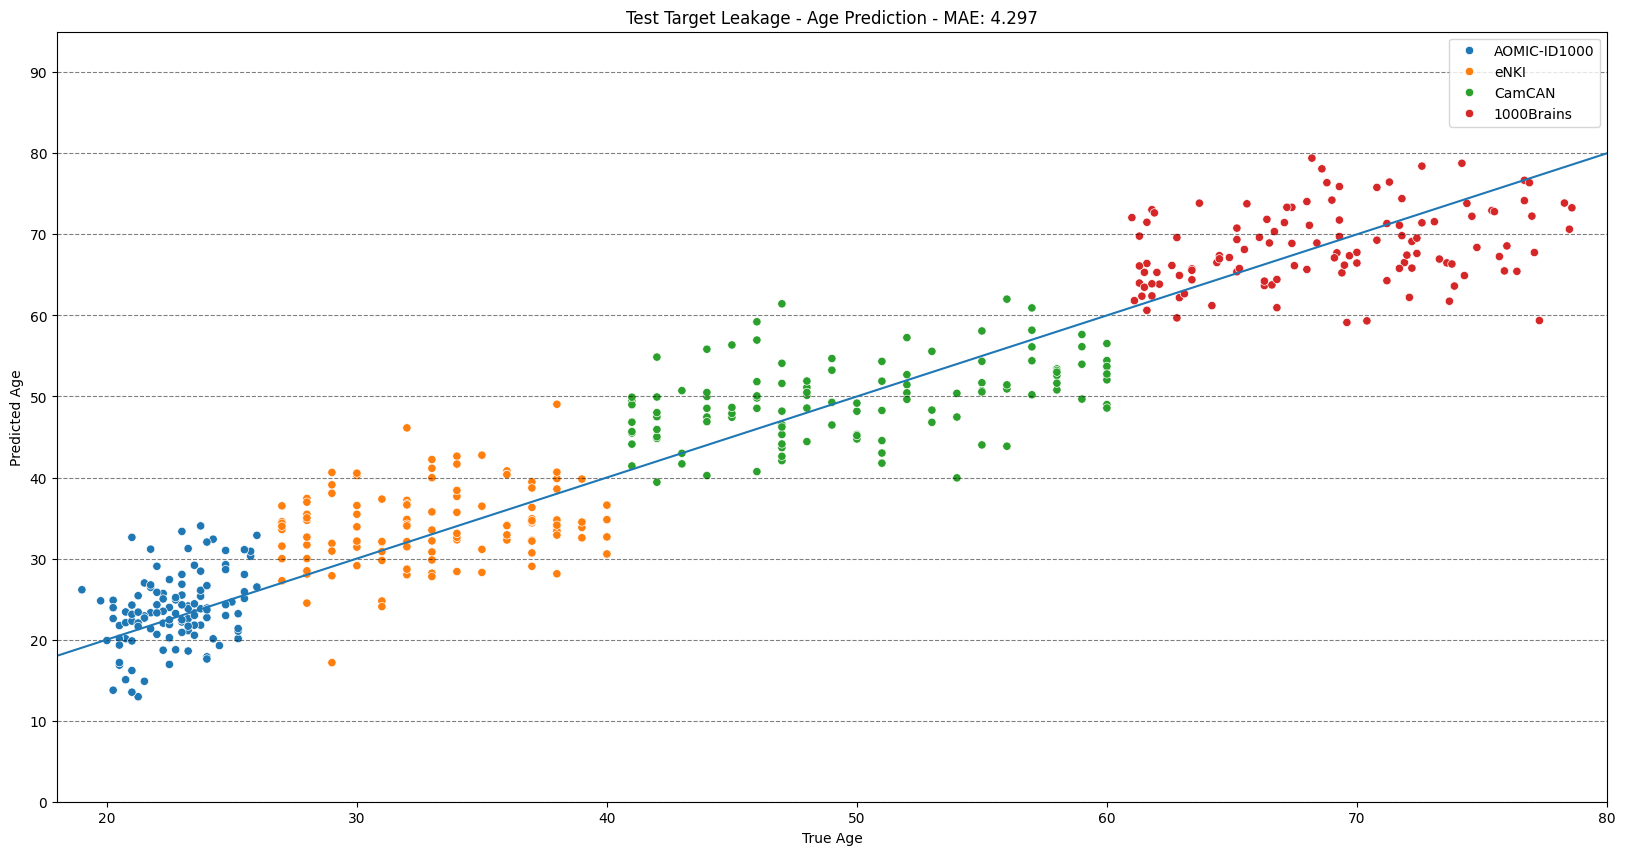

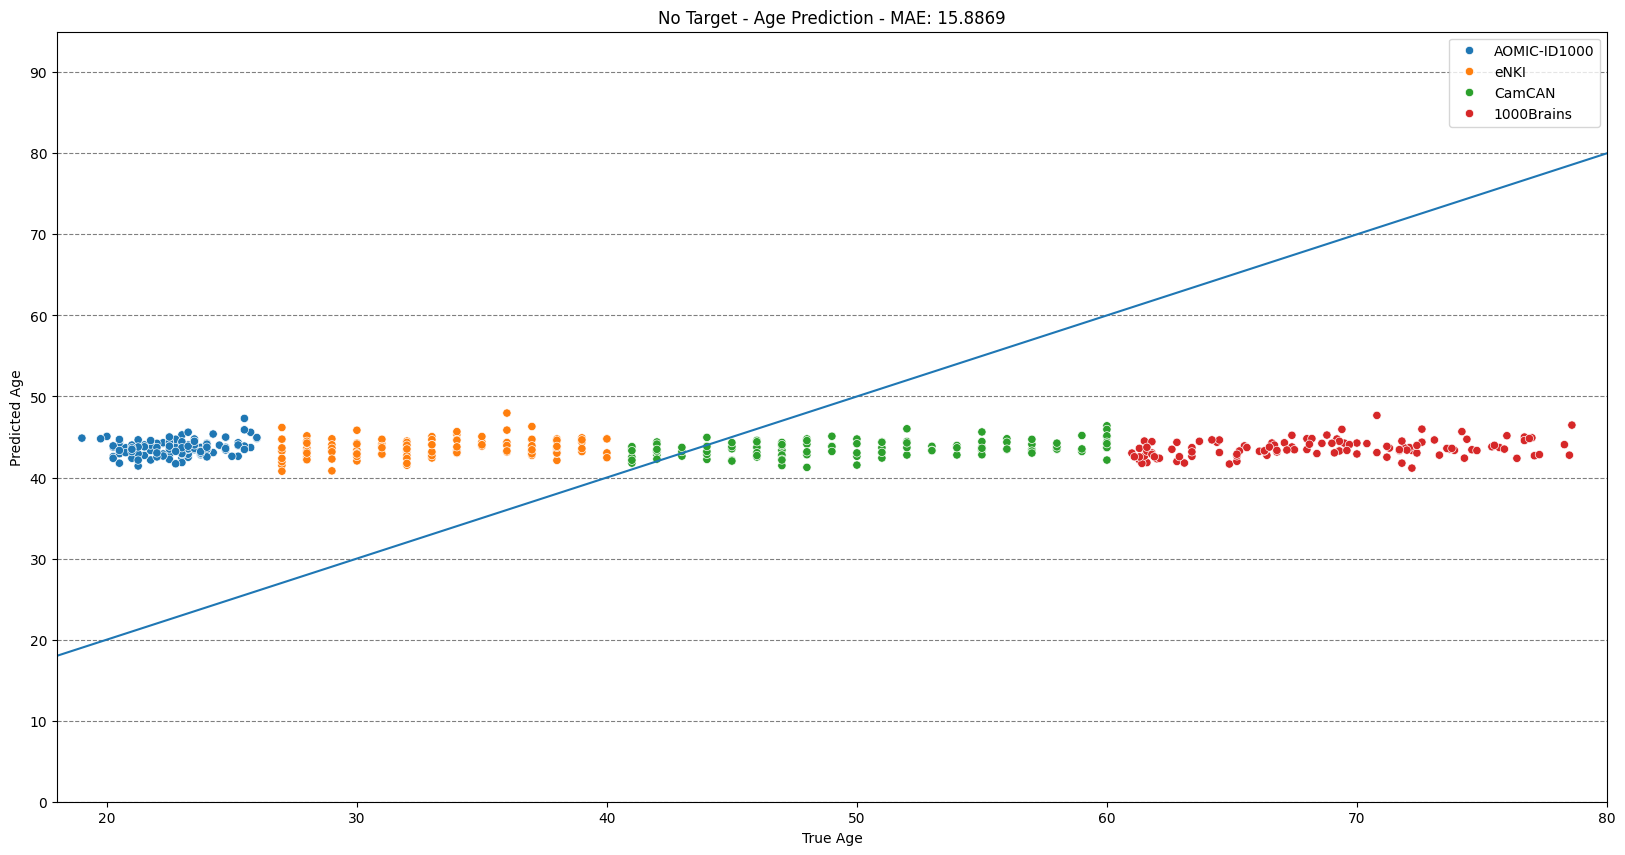

In [3]:
harm_modes = ["Unharmonized", "PrettYharmonize", "Whole Data Harmonization", "Test Target Leakage",  "No Target"]

results["Harmonization Scheme"].replace({"PrettyHarmonize": "PrettYharmonize",
                                "TTL": "Test Target Leakage",
                                "Unharmonized": "Unharmonized",
                                "WDH": "Whole Data Harmonization",
                                "NoTarget": "No Target"}, inplace=True)

results["site"].replace({0: "AOMIC-ID1000",
                                1: "eNKI",
                                2: "CamCAN",
                                3: "1000Brains",}, inplace=True)
data = results



absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]


hue_order = ['AOMIC-ID1000', 'eNKI', 'CamCAN', '1000Brains',]
for harm_to_plot in harm_modes:
    data_to_plot = data[data["Harmonization Scheme"] == harm_to_plot]
    fig, ax = plt.subplots(1, 1, figsize=[20, 10])
    pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)
    sbn.scatterplot(
        data=data_to_plot,
        x="y_true", y="y_pred", hue="site", hue_order=hue_order
    )
    plt.ylabel("Predicted Age")
    MAE = round(mean_absolute_error(data_to_plot["y_true"],data_to_plot["y_pred"]),4)
    plt.title(harm_to_plot + " - Age Prediction - MAE: " + str(MAE))
    plt.xlabel("True Age")
    age_range_y = [0,95]
    grid_distance = 10
    plt.yticks(np.arange(age_range_y[0], age_range_y[1], grid_distance))
    plt.grid(alpha=0.5, which="both", axis="y", c="black", linestyle="--")
    plt.legend([],framealpha=0)
    age_range = [18,80]
    plt.xlim(age_range)

    plt.ylim(age_range_y)
    sbn.lineplot(x=age_range, y=age_range)
    plt.show()





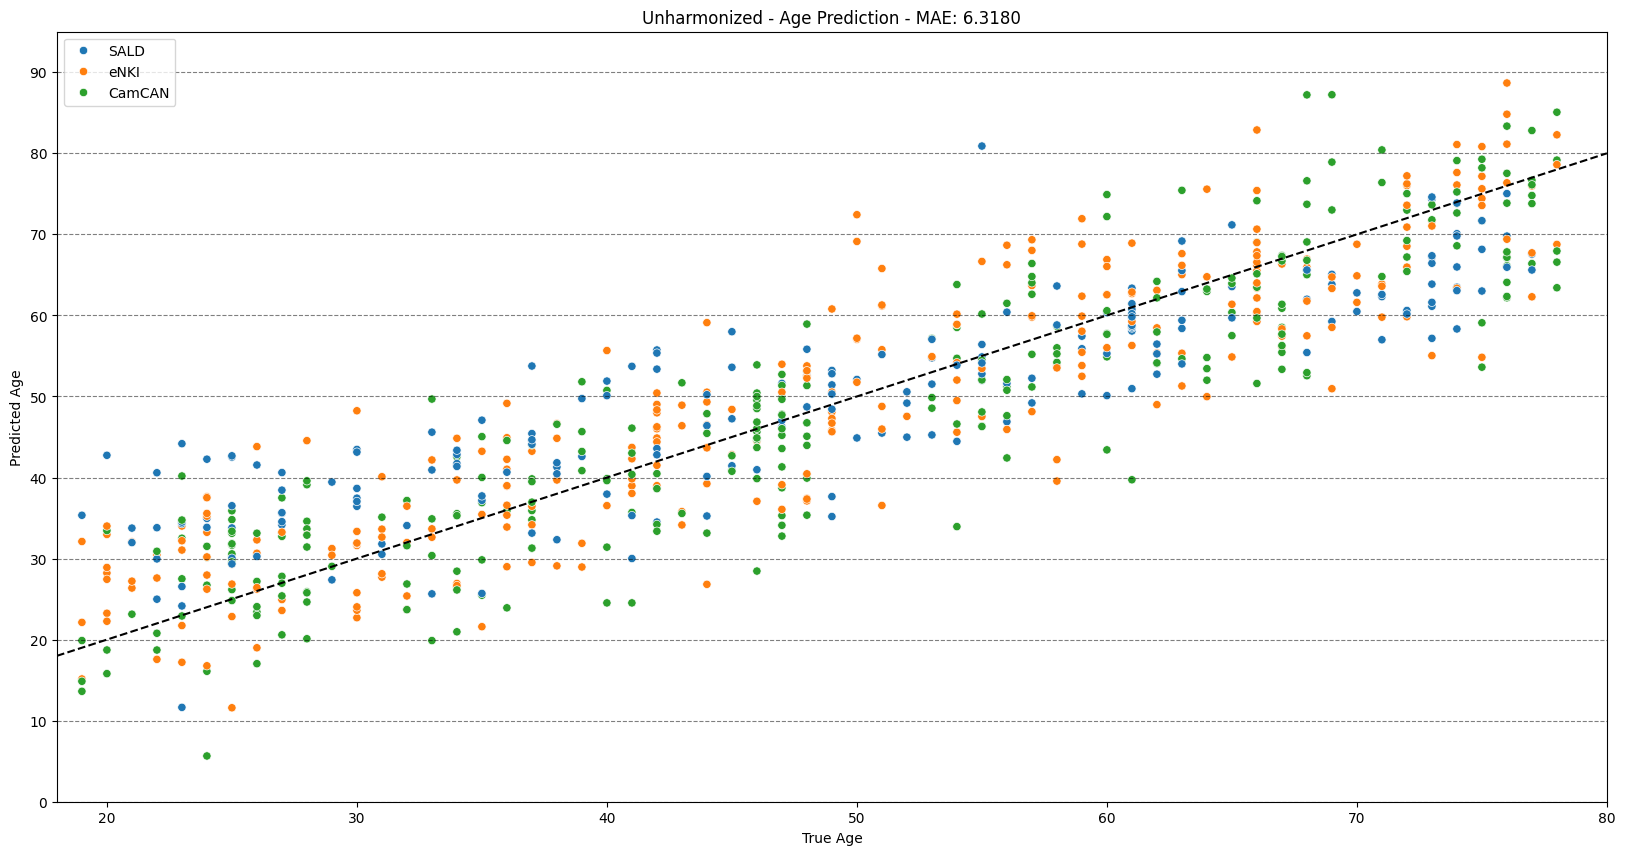

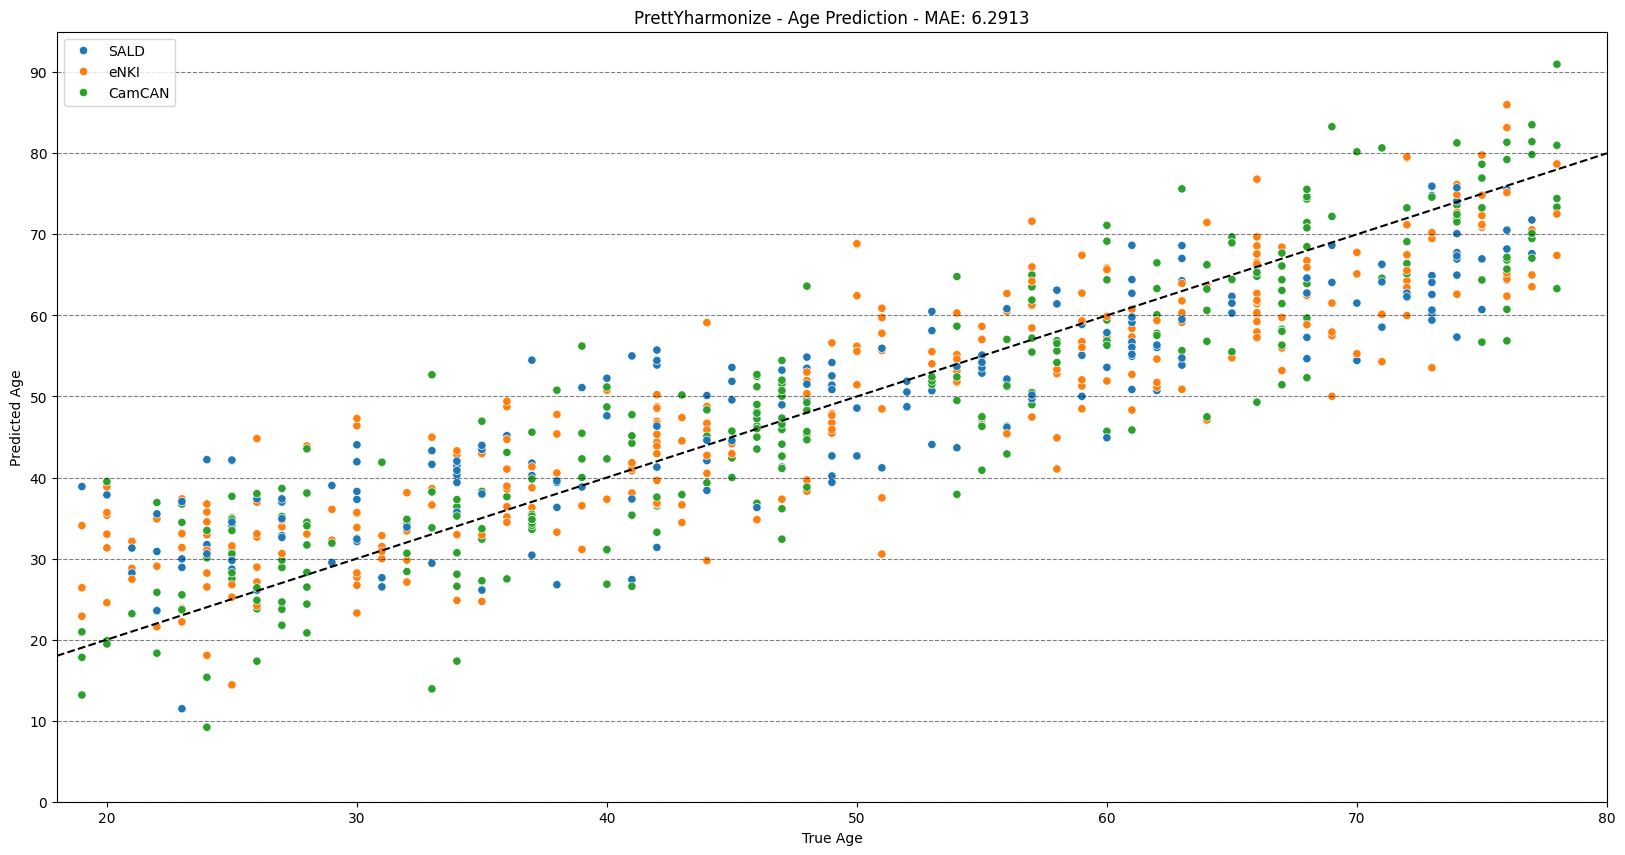

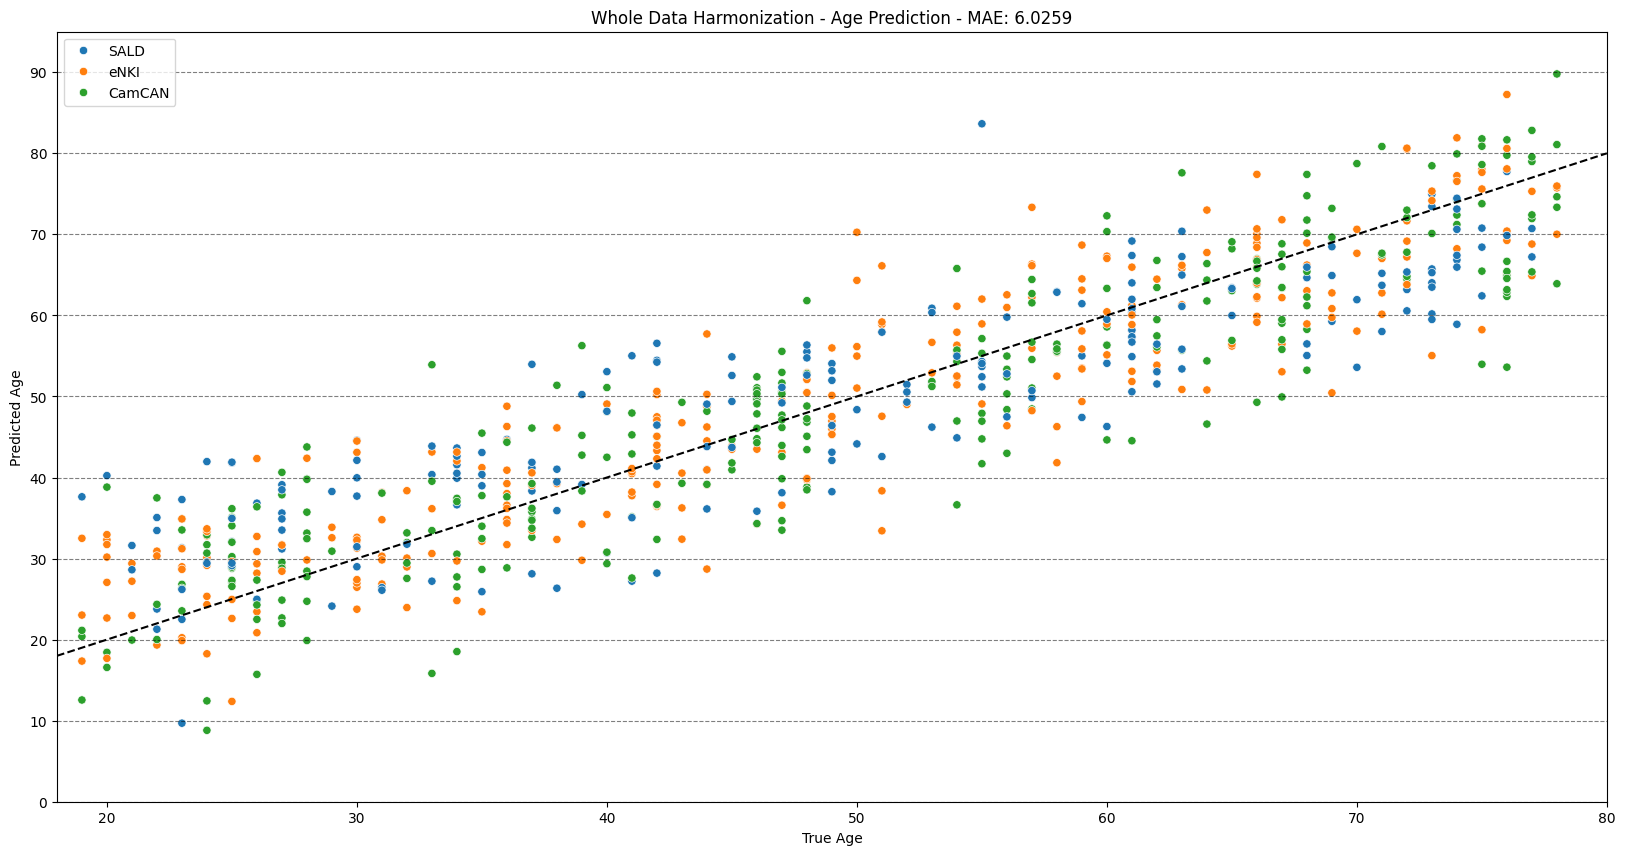

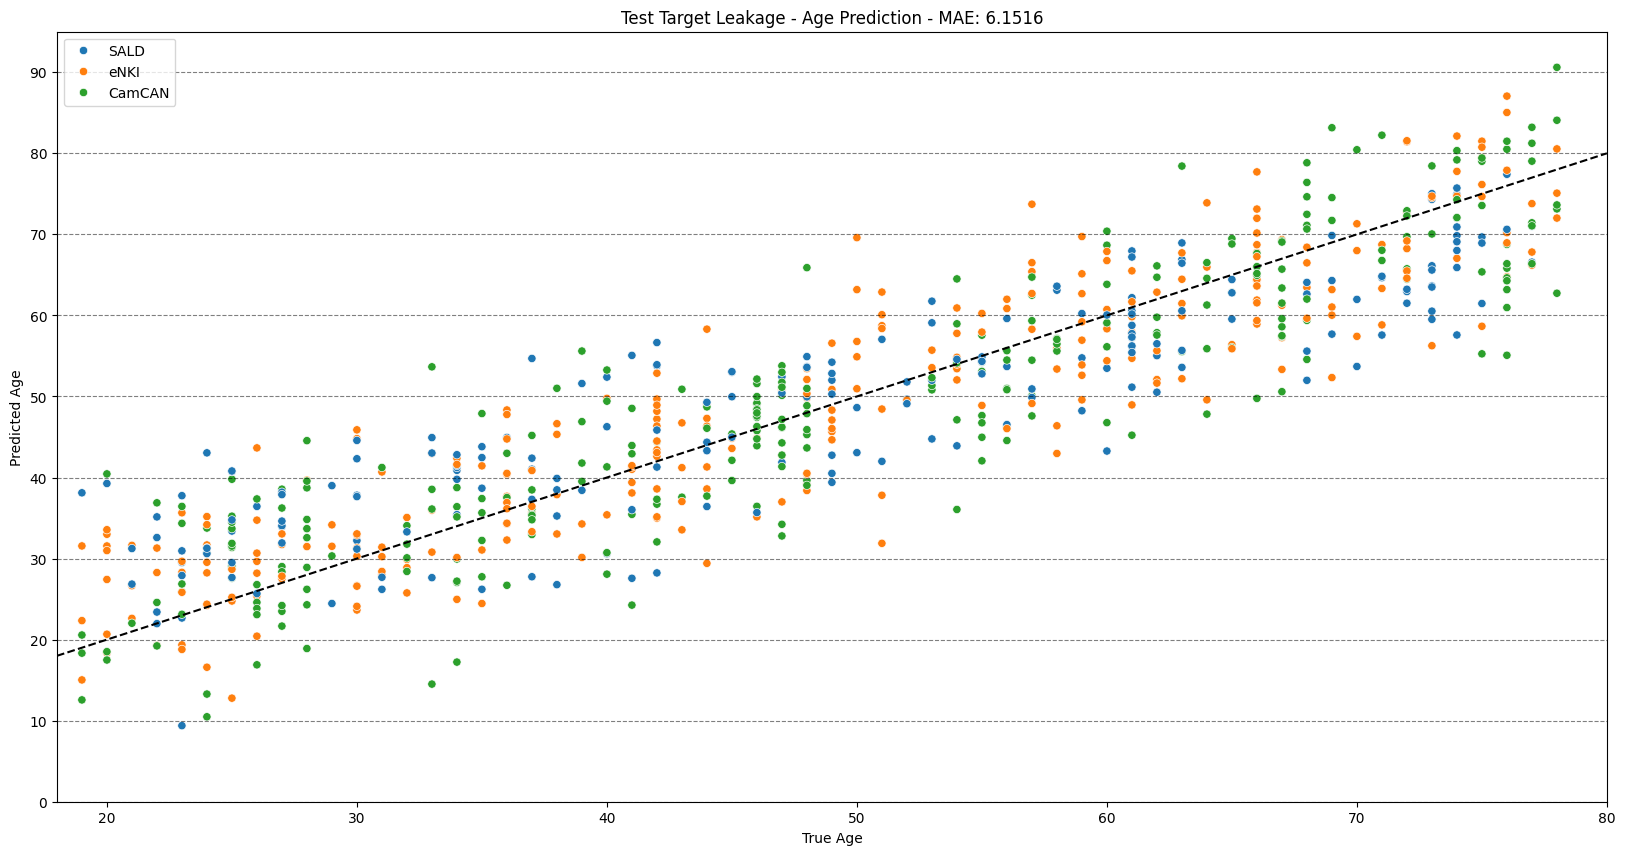

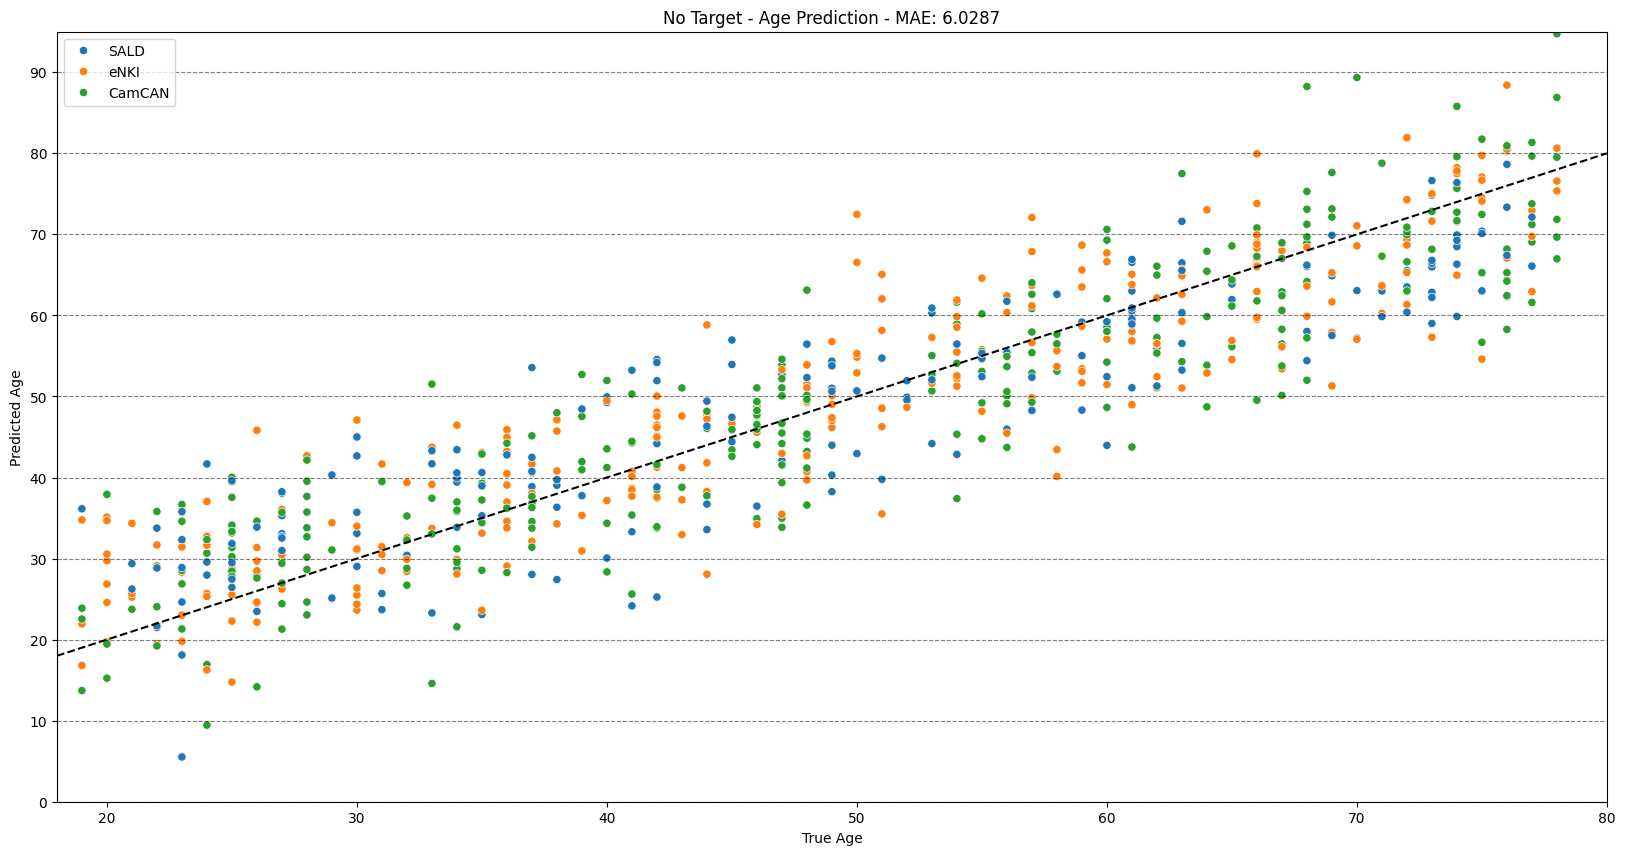

In [4]:
# Define the directory containing the prediction files
exp_dir = project_root + "/output/predictions_age_regression/"

# Define the experiments to check
experiments_to_check = {'site-target_independence'}

# Extract experiment data using the provided utility function
data = extract_experiment_data(exp_dir, experiments_to_check)

# Replace site names for consistency
data["site"].replace({
    "1000Gehirne": "1000Brains",
    "ID1000": "AOMIC-ID1000"
}, inplace=True)

# Replace harmonization scheme names for better readability
data["Harmonization Schemes"].replace({
    "pretend": "PrettYharmonize",
    "target": "Test Target Leakage",
    "none": "Unharmonized",
    "cheat": "Whole Data Harmonization",
    "predict": "NeuroHarmony",
    "notarget": "No Target"
}, inplace=True)

# Define the harmonization modes to plot
harm_modes = [
    "Unharmonized", 
    "PrettYharmonize", 
    "Whole Data Harmonization", 
    "Test Target Leakage", 
    "No Target"
]

# Calculate the difference between true and predicted values
# Use absolute difference if the `absolute` flag is set to True
if absolute:
    data["y_diff"] = np.abs(data["y_true"] - data["y_pred"])
else:
    data["y_diff"] = data["y_true"] - data["y_pred"]

# Define the order of sites for consistent coloring in plots
hue_order = ['SALD', 'eNKI', 'CamCAN']

# Loop through each harmonization mode and create scatter plots
for harm_to_plot in harm_modes:
    # Filter data for the current harmonization mode
    data_to_plot = data[data["Harmonization Schemes"] == harm_to_plot]
    
    # Create a new figure for the plot
    fig, ax = plt.subplots(1, 1, figsize=[20, 10])
    
    # Define a color palette for the scatter plot
    pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)
    
    # Create a scatter plot of true vs predicted values, colored by site
    sbn.scatterplot(
        data=data_to_plot,
        x="y_true", 
        y="y_pred", 
        hue="site", 
        hue_order=hue_order
    )
    
    # Add labels and title to the plot
    plt.ylabel("Predicted Age")
    plt.xlabel("True Age")
    MAE = mean_absolute_error(data_to_plot["y_true"], data_to_plot["y_pred"])
    plt.title(f"{harm_to_plot} - Age Prediction - MAE: {MAE:.4f}")
    
    # Set y-axis range and grid lines
    plt.yticks(np.arange(age_range_y[0], age_range_y[1], grid_distance))
    plt.grid(alpha=0.5, which="both", axis="y", c="black", linestyle="--")
    
    # Remove legend for cleaner visualization
    plt.legend([], framealpha=0)
    
    # Set x and y-axis limits
    plt.xlim(age_range)
    plt.ylim(age_range_y)
    
    # Add a diagonal line representing perfect predictions
    sbn.lineplot(x=age_range, y=age_range, color="black", linestyle="--")
    
    # Display the plot
    plt.show()
